In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error

In [8]:
!pip install statsmodels


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
df= pd.read_csv("store_item_demand16.csv")
df.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


In [12]:
df.shape

(913000, 4)

In [14]:
# CONVERT DATE COLUMN
df["date"]= pd.to_datetime(df["date"])

In [18]:
# AGGREGATE SALES MONTHLY
monthly_sales= df.groupby(
    pd.Grouper(key= 'date', freq= 'ME')
)['sales'].sum()

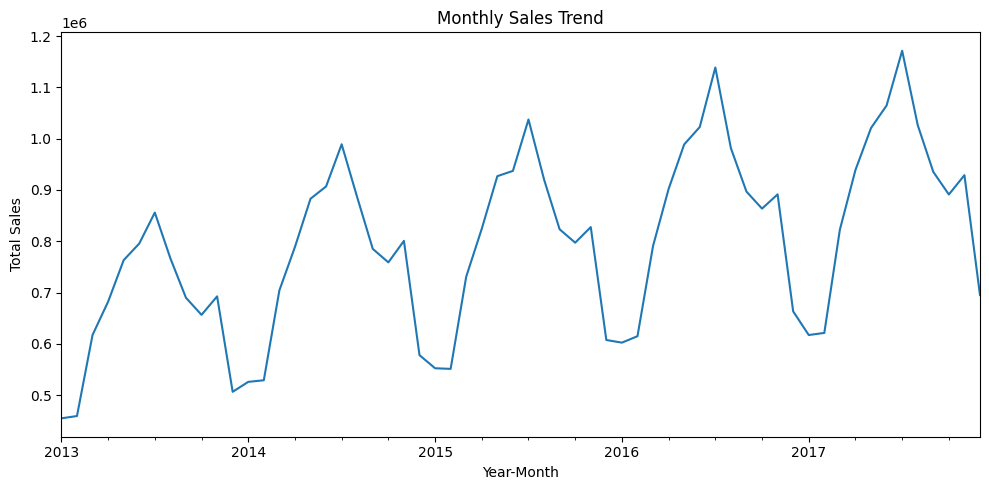

In [26]:
# PLOT SALES TREND
monthly_sales.plot(figsize=(10,5))
plt.title("Monthly Sales Trend")
plt.xlabel("Year-Month")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()

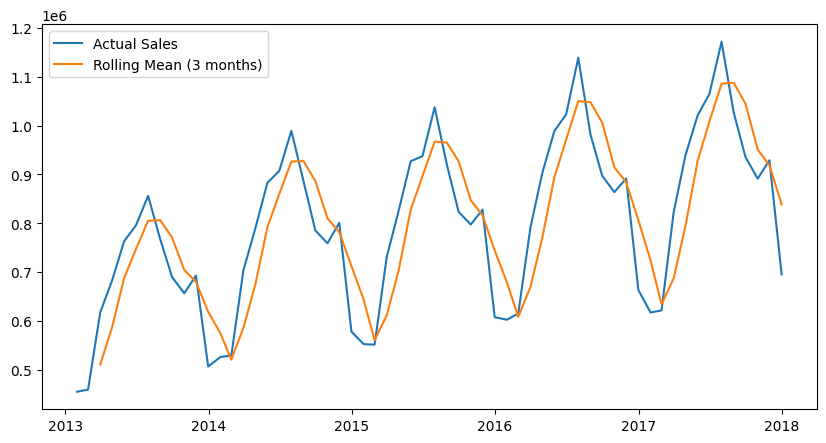

In [28]:
#CHECK SEASONALITY (Rolling Mean)
rolling_mean= monthly_sales.rolling(window= 3).mean()

plt.figure(figsize= (10,5))
plt.plot(monthly_sales, label= "Actual Sales")
plt.plot(rolling_mean, label= "Rolling Mean (3 months)")
plt.legend()
plt.show()

In [29]:
# Train-Test Split 
    ## Time series must split by time, NOT randomly.
train= monthly_sales[:-6]
test= monthly_sales[-6:]    # last 6 months= test data

In [30]:
# FIT FORECAST MODEL

model= ExponentialSmoothing(
    train,
    trend= 'add',
    seasonal= None
).fit()

In [31]:
# FORECAST
forecast= model.forecast(steps= 6)

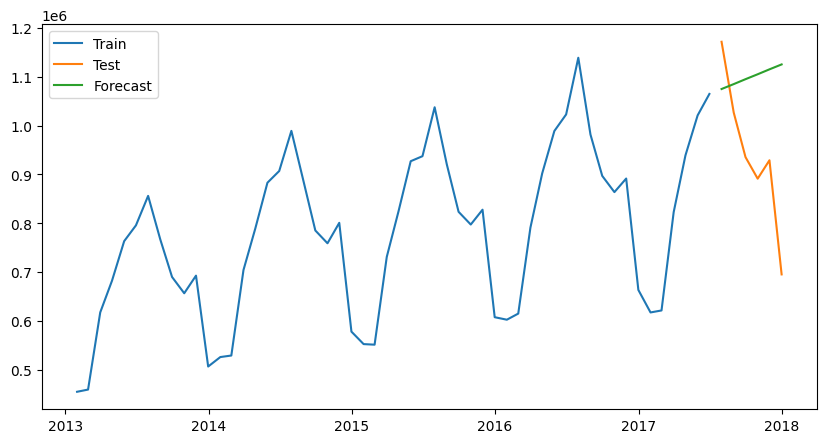

In [33]:
# PLOT FORECAST
plt.figure(figsize=(10,5))
plt.plot(train, label= "Train")
plt.plot(test, label= "Test")
plt.plot(forecast, label= "Forecast")
plt.legend()
plt.show()

In [35]:
 # ERROE METRICS(MAE)
mae= round(mean_absolute_error(test,forecast),2)
print("MAE:", mae)

MAE: 190724.01


In [36]:
mape = np.mean(np.abs((test - forecast)/test)) * 100
print("MAPE:", mape)


MAPE: 22.809927141722987
